In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
songs = pd.read_csv("spotify-2023.csv", encoding="latin-1")

## Viewing the dataset and analyzing columns

In [3]:
songs.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [5]:
songs.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [6]:
#converting streams to int and removing non-int values
songs["streams"].dtype

#songs["streams"].str.replace(',' , '')
songs['streams'] = pd.to_numeric(songs["streams"],errors='coerce')

songs = songs.dropna(subset="streams")


# Hypotheses

## More playlists = more popularity
## High danceability and valence → more playlists, more streams
## More streams = more popularity


In [7]:
# Most streamed Songs
top_songs = songs.sort_values(by="streams", ascending=False)
print(top_songs[["track_name", "streams"]].head(10).to_string())

                                        track_name       streams
55                                 Blinding Lights  3.703895e+09
179                                   Shape of You  3.562544e+09
86                               Someone You Loved  2.887242e+09
620                                   Dance Monkey  2.864792e+09
41   Sunflower - Spider-Man: Into the Spider-Verse  2.808097e+09
162                                      One Dance  2.713922e+09
84                       STAY (with Justin Bieber)  2.665344e+09
140                                       Believer  2.594040e+09
725                                         Closer  2.591224e+09
48                                         Starboy  2.565530e+09


In [8]:
# Most streamed Artists (top 10)
top_artists = songs.groupby("artist(s)_name")["streams"].sum().sort_values(ascending=False)
print(top_artists.head(10).to_string())

artist(s)_name
The Weeknd         1.418555e+10
Taylor Swift       1.405366e+10
Ed Sheeran         1.390895e+10
Harry Styles       1.160865e+10
Bad Bunny          9.997800e+09
Olivia Rodrigo     7.442149e+09
Eminem             6.183806e+09
Bruno Mars         5.846921e+09
Arctic Monkeys     5.569807e+09
Imagine Dragons    5.272485e+09


In [9]:
# Artists with the most songs
top_artists = songs.groupby("artist(s)_name")["track_name"].nunique().sort_values(ascending=False)
print(top_artists)

artist(s)_name
Taylor Swift                                                                               34
The Weeknd                                                                                 21
SZA                                                                                        19
Bad Bunny                                                                                  19
Harry Styles                                                                               17
                                                                                           ..
Victor Cibrian                                                                              1
Vishal-Shekhar, Shilpa Rao, Caralisa Monteiro, Kumaar, Vishal Dadlani, Shekhar Ravjiani     1
Vundabar                                                                                    1
Wham!                                                                                       1
Aerosmith                                    

In [10]:
# Songs with most playlist occurrences
most_playlists = songs[["track_name","artist(s)_name","in_spotify_playlists"]].sort_values(by='in_spotify_playlists',ascending=False)
print(most_playlists.head(10).to_string())

                                    track_name                              artist(s)_name  in_spotify_playlists
757                     Get Lucky - Radio Edit  Pharrell Williams, Nile Rodgers, Daft Punk                 52898
630                             Mr. Brightside                                 The Killers                 51979
720                    Wake Me Up - Radio Edit                                      Avicii                 50887
624  Smells Like Teen Spirit - Remastered 2021                                     Nirvana                 49991
199                                 Take On Me                                        a-ha                 44927
55                             Blinding Lights                                  The Weeknd                 43899
162                                  One Dance                         Drake, WizKid, Kyla                 43257
727               Somebody That I Used To Know                               Gotye, Kimbra      

# Data Visualization

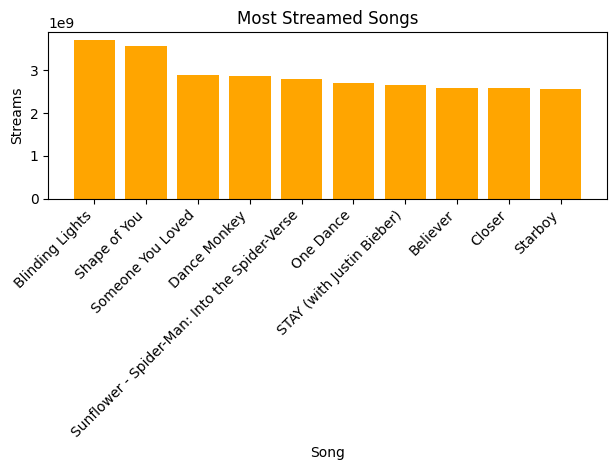

In [11]:
top_10 = top_songs.head(10)
import matplotlib.pyplot as plt

plt.bar(top_10["track_name"], top_10["streams"], color='orange')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Song")
plt.ylabel("Streams")
plt.title("Most Streamed Songs")
plt.tight_layout()
plt.show()

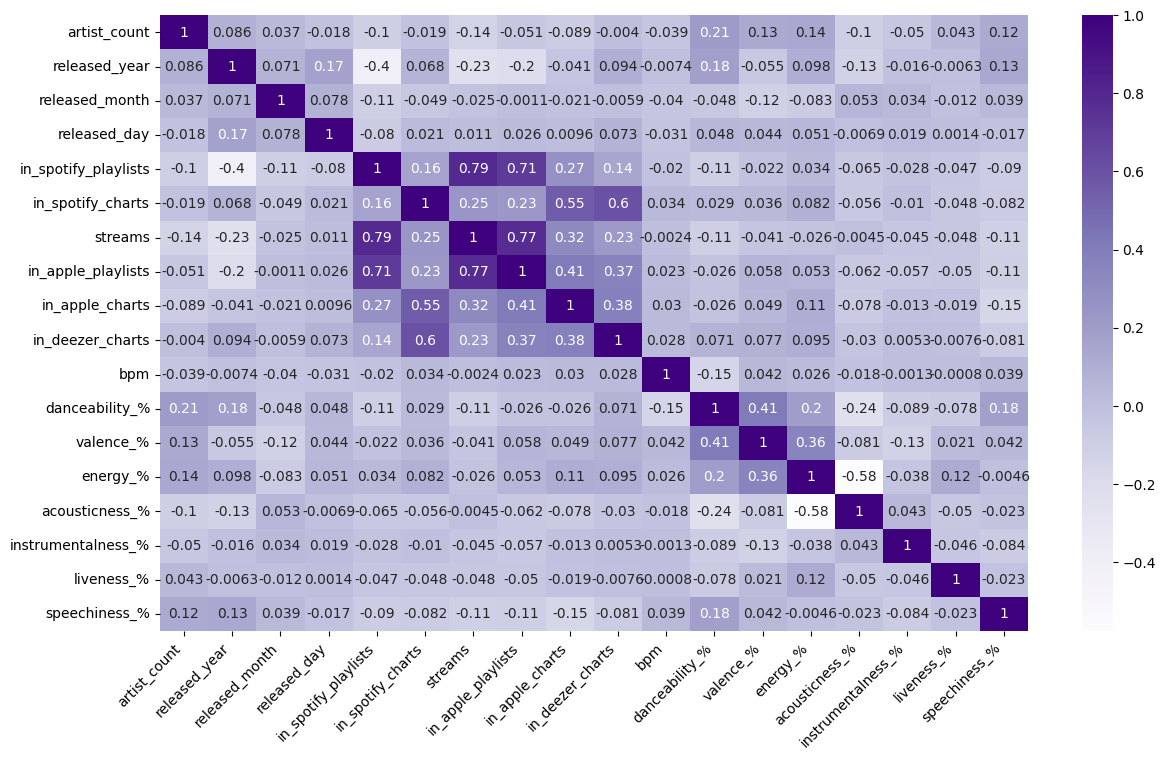

In [12]:
# Heatmap for correlation among variables
import seaborn as sns

plt.figure(figsize=(14, 8))

cm = songs.corr(numeric_only=True)
sns.heatmap(cm, cmap='Purples', annot=True)

plt.xticks(rotation=45,ha='right')

plt.show()

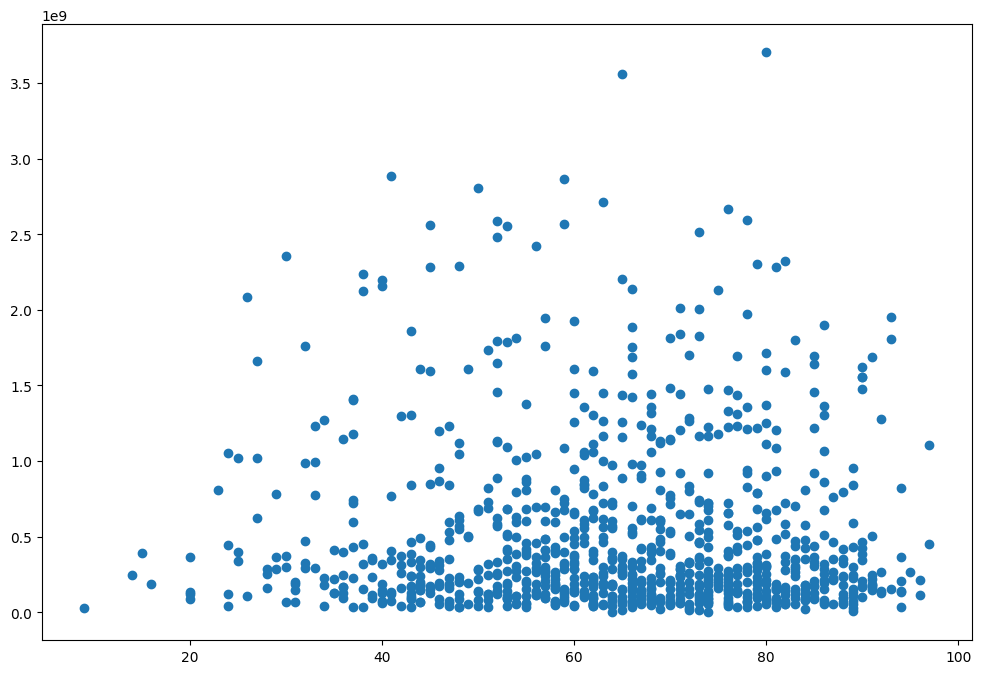

In [13]:
plt.figure(figsize=(12, 8))
plt.scatter(songs["energy_%"], songs["streams"])

plt.show()

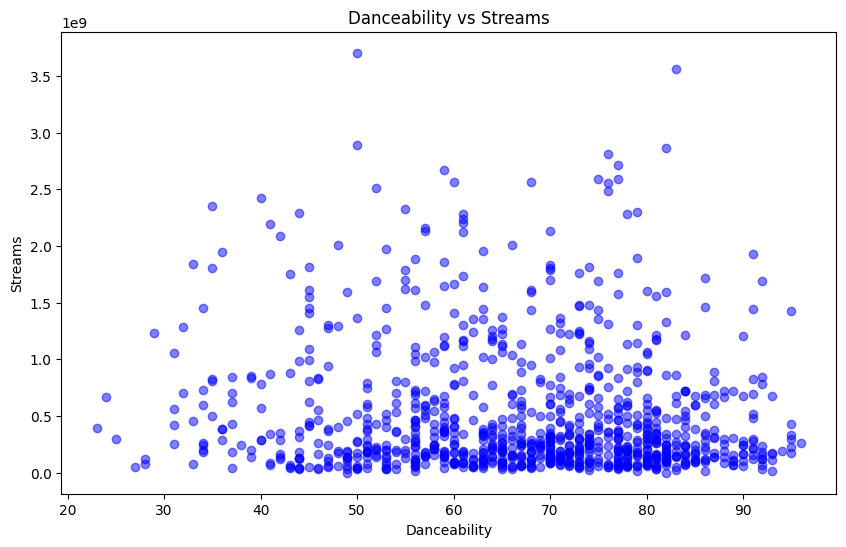

In [14]:
# Relationship Between Danceability and Streams
plt.figure(figsize=(10, 6))
plt.scatter(songs['danceability_%'], songs['streams'], alpha=0.5, color='blue')
plt.xlabel("Danceability")
plt.ylabel("Streams")
plt.title("Danceability vs Streams")
plt.show()


<ipython-input-18-2704584597>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.index, y=top_artists.values, palette='magma')


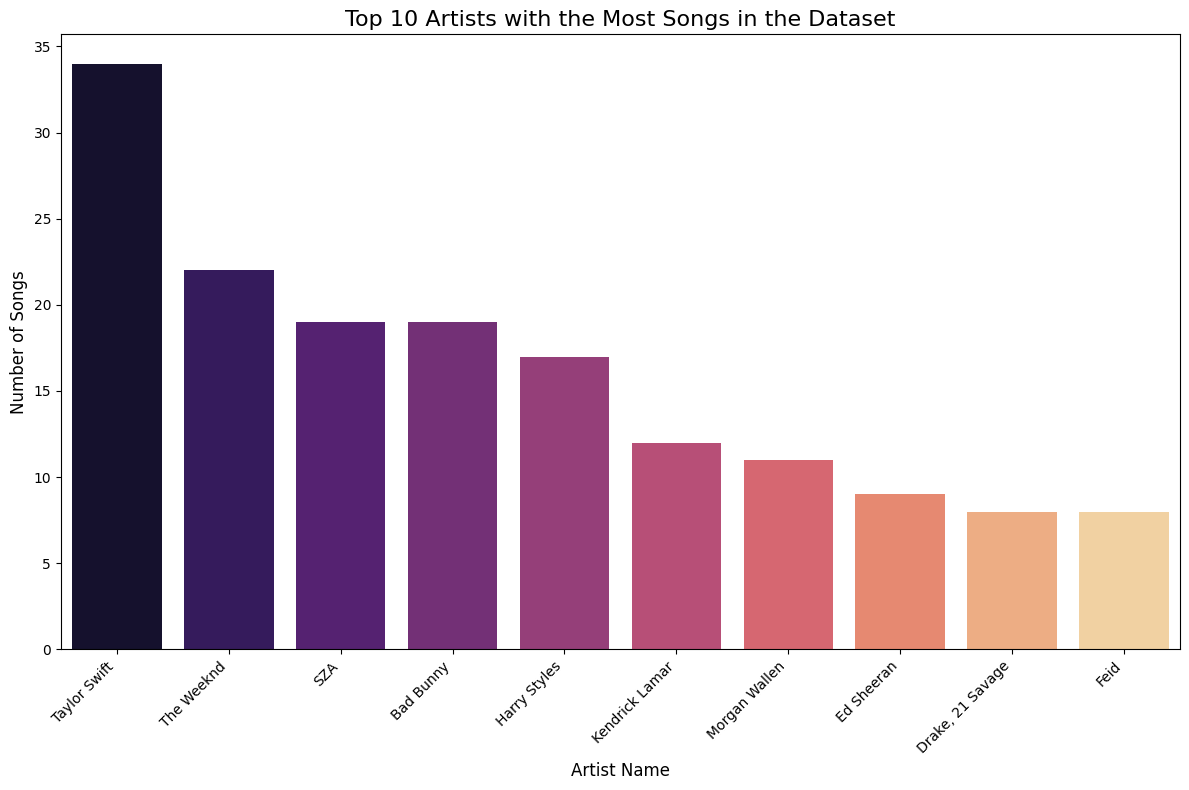

In [18]:

plt.figure(figsize=(12, 8))

sns.barplot(x=top_artists.index, y=top_artists.values, palette='magma')

plt.xticks(rotation=45, ha='right')

plt.xlabel('Artist Name', fontsize=12)
plt.ylabel('Number of Songs', fontsize=12)
plt.title('Top 10 Artists with the Most Songs in the Dataset', fontsize=16)

plt.tight_layout()

plt.show()


<ipython-input-22-1227739602>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='in_spotify_playlists', y='track_name', data=most_playlists, palette='viridis')


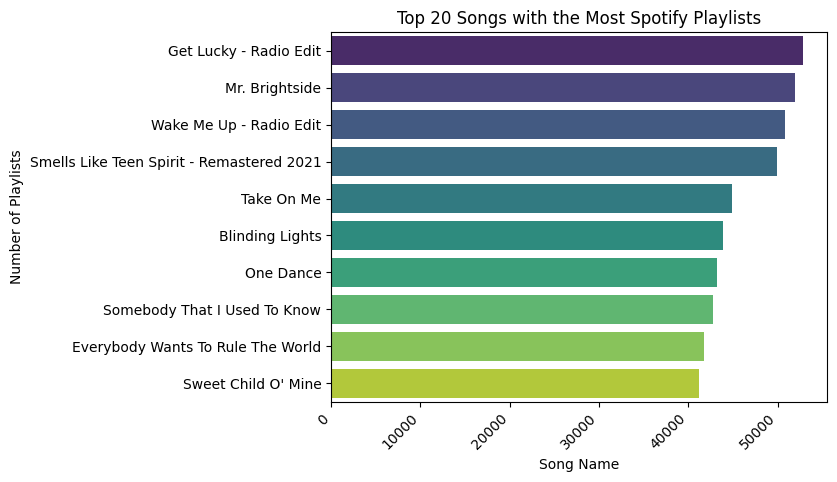

In [22]:
most_playlists = songs[["track_name","artist(s)_name","in_spotify_playlists"]].sort_values(by='in_spotify_playlists',ascending=False).head(10)

sns.barplot(x='in_spotify_playlists', y='track_name', data=most_playlists, palette='viridis')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.xlabel('Song Name')
plt.ylabel('Number of Playlists')
plt.title('Top 20 Songs with the Most Spotify Playlists')
plt.show()